In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/raw/train.csv').set_index('PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train.loc[train.Cabin.isnull(), :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [62]:
train['Cabin'] = [x[0].upper() if type(x) is str else np.nan for x in train.Cabin]
train_cabin = train.groupby(['PassengerId', 'Cabin']).size().unstack(fill_value = 0).drop(['T'], axis = 1).add_prefix("Cabin_")

In [63]:
test['Cabin'] = [x[0].upper() if type(x) is str else np.nan for x in test.Cabin]
test_cabin = test.groupby(['PassengerId', 'Cabin']).size().unstack(fill_value = 0).add_prefix("Cabin_")

In [ ]:
train.Cabin.map({'A': 'A', ''})

In [64]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train.Cabin.value_counts(dropna = False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin, dtype: int64

In [71]:
train.groupby(['Cabin']).mean()['Survived']

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

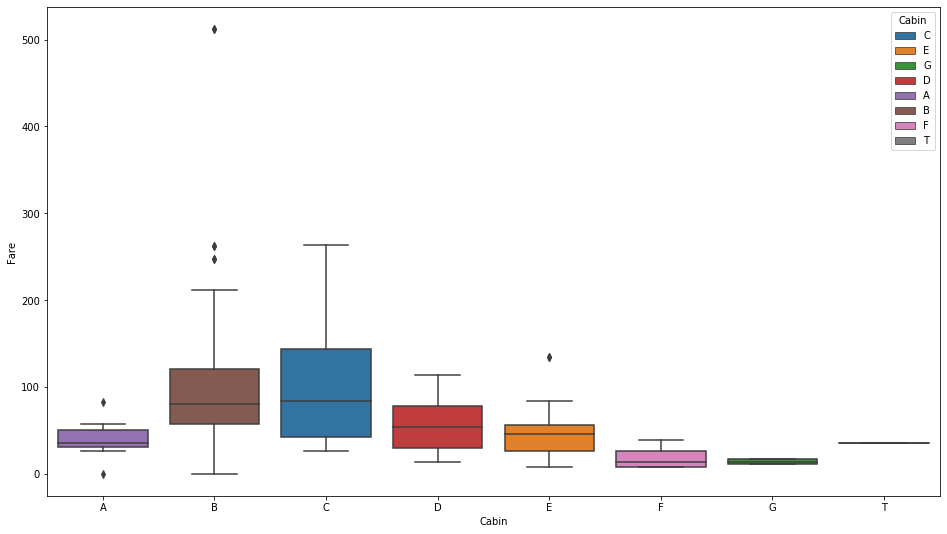

In [89]:
plt.figure(figsize=(16,9))
sns.boxplot(x = 'Cabin', y = 'Fare',
            hue = 'Cabin', 
            dodge = False,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
            data = train)

In [ ]:
train.groupby(["Pclass", "Sex", 'Embarked', 'Cabin']).size()

In [ ]:
train.loc[train.Cabin.isnull(), 'Cabin'] = 'NA' 